In [13]:
import sys
sys.path.append("../src")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv("../src/MAE.csv")
df = df[df['processor'] == "AQT"]
em1 = df[df['emitter'] == "Emitter 1"]
em2 = df[df['emitter'] == "Emitter 2"]

order = [
    "No err. mit.",
    "RC 40",
    "RC 80",
    "RC 40 + NOX 1",
    "RC 40 + NOX 2",
    "RC 40 + NOX 3",
    "RC 40 + NOX 4",
    "RC 40 + NOX 6",
]

em1 = em1.set_index("condition").reindex(order).reset_index()
em2 = em2.set_index("condition").reindex(order).reset_index()

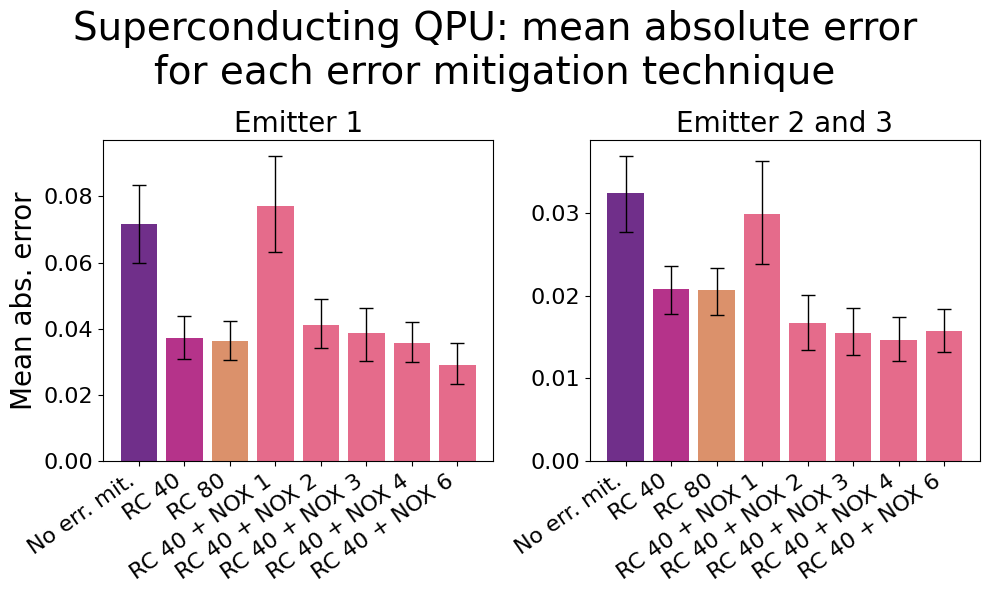

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

colors = [
    "#702f8a",
    "#b5338a",
    "#db916b",
    "#e56b8b",
    "#e56b8b",
    "#e56b8b",
    "#e56b8b",
    "#e56b8b",
]

axes[0].bar(np.arange(len(em1)), em1["MAE"], 
        yerr=np.vstack([em1["lower_err"], em1["upper_err"]]),
        capsize=5,
        ecolor='black',      # color of error bars
        color=colors,
        error_kw={
            'capthick': 1,   # thickness of cap lines
            'elinewidth': 1  # thickness of error bars
        })
axes[0].set_xticks(np.arange(len(em1)))
axes[0].set_xticklabels(em1["condition"], rotation=35, ha='right', fontsize=16)
axes[0].tick_params(axis='y', labelsize=16)
axes[0].set_title("Emitter 1", fontsize=20)
axes[0].set_ylabel("Mean abs. error", fontsize=20)

axes[1].bar(np.arange(len(em2)), em2["MAE"], 
        yerr=np.vstack([em2["lower_err"], em2["upper_err"]]),
        capsize=5,
        ecolor='black',      # color of error bars
        color=colors,
        error_kw={
            'capthick': 1,   # thickness of cap lines
            'elinewidth': 1  # thickness of error bars
        })
axes[1].set_xticks(np.arange(len(em2)))
axes[1].set_xticklabels(em2["condition"], rotation=35, ha='right', fontsize=16)
axes[1].tick_params(axis='y', labelsize=16)
axes[1].set_title("Emitter 2 and 3", fontsize=20)

fig.suptitle("Superconducting QPU: mean absolute error\nfor each error mitigation technique", fontsize=28)
plt.tight_layout()

In [16]:
fig.savefig("../figures/AQT_MAE.eps", bbox_inches="tight")